In [11]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt



In [12]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Bone fracture_infoo/Dataset/canny Edge/training'
valid_path = '/content/drive/MyDrive/Bone fracture_infoo/Dataset/canny Edge/testing'

In [27]:
from tensorflow.keras.applications import MobileNetV2

mobilenetv2 = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Don't train existing weights
for layer in mobilenetv2.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [30]:
x = Flatten()(mobilenetv2 .output)

In [33]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import InceptionV3


prediction = Dense(1, activation='sigmoid')(x)

model = Model(inputs=mobilenetv2.input, outputs=prediction)

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_5[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [34]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Bone fracture_infoo/Dataset/canny Edge/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Bone fracture_infoo/Dataset/canny Edge/testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 8845 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


277/277 [==============================] - 151s 545ms/step - loss: 1.3453 - accuracy: 0.5000 - val_loss: 1.2361 - val_accuracy: 0.5000


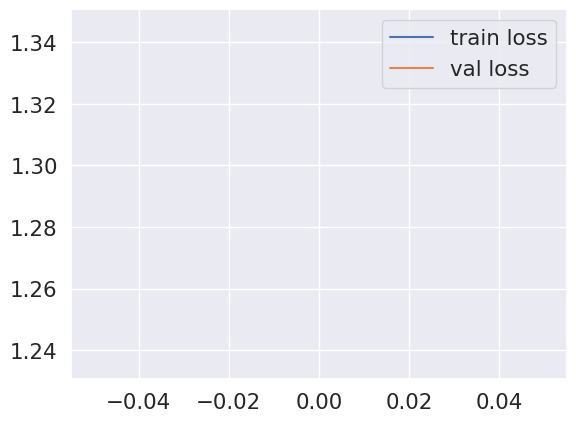

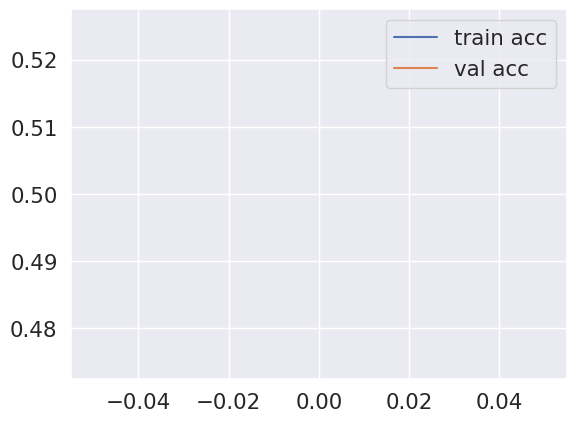

19/19 [==============================] - 4s 170ms/step
Confusion Matrix:
[[301  59]
 [210  30]]


<Figure size 640x480 with 0 Axes>

In [36]:

r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have test data and ground truth labels
y_true = test_set.classes  # Ground truth labels
y_pred_probs = model.predict(test_set)  # Predicted probabilities
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)  # Convert probabilities to binary predictions

cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)

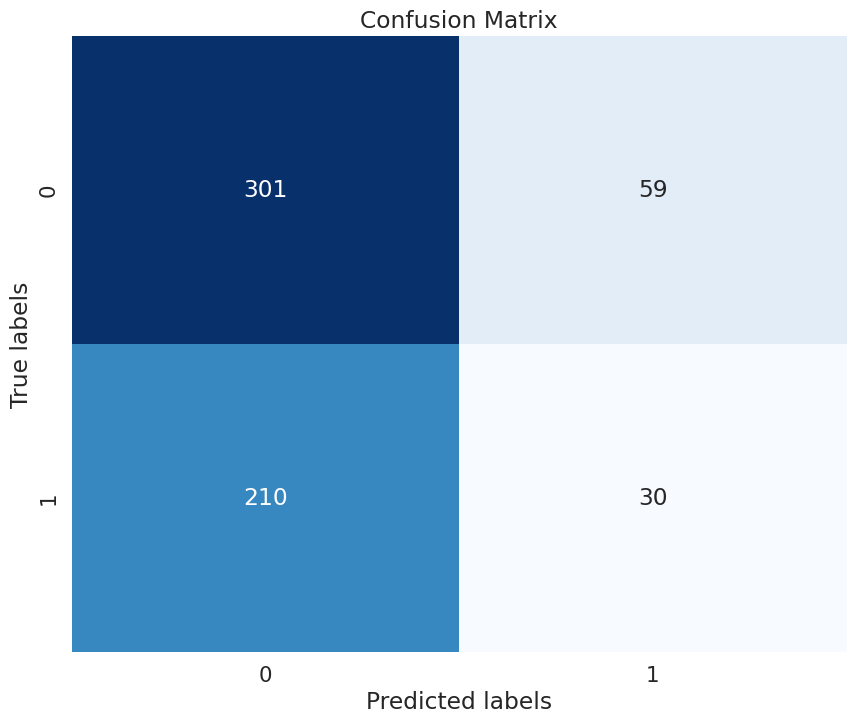

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns



# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('Confusion_Matrix.png')  # Save the confusion matrix as a PNG file
plt.show()

In [ ]:
model_path = 'model/inceptionv3.h5'

# Save the model in .h5 format
tf.keras.models.save_model(model, model_path, save_format='h5')